In [1]:
import pandas as pd

In [3]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/CCIC 3.0 Tech/Dataset/tweets_historical_merged_fin.csv')
df1.head()

,Mkt-RF,date,SMB,HML,RMW,CMA,RF,Open,High,Low,Close,Adj Close,Volume,ticker,RSI_14D,BB_MIDDLE_BAND,BB_UPPER_BAND,BB_LOWER_BAND,Aroon_oscillator,PVT,Momentum,tr0,tr1,tr2,TR,ATR,BUB,BLB,FUB,FLB,ST,#Tweets,#TotalUsers,likes_countnorm_sum,retweets_countnorm_sum,replies_countnorm_sum,lm_val_weighted_sum,lm_pos_weighted_sum,lm_neg_weighted_sum,lm_sent_weighted_sum,distil_weighted_weighted_sum,likes_countnorm_mean,retweets_countnorm_mean,replies_countnorm_mean,lm_val_weighted_mean,lm_pos_weighted_mean,lm_neg_weighted_mean,lm_sent_weighted_mean,distil_weighted_weighted_mean,Total_tweets_today,%Tweets_day
0,-0.70,2017-03-02,-0.54,-0.90,0.65,-0.46,0.001,24.000000,26.049999,23.500000,24.480000,24.480000,217048900,SNAP,0.000000,0.000,0.000,0.000,0.0,0.000000e+00,0.000000,2.549999,NaN,NaN,2.55,0.000000,24.77,24.77,0.00,0.00,0.00,289.0,121.0,0.004985,0.009505,0.008229,0.034246,0.000378,0.000750,-0.000398,-0.003812,0.000017,0.000033,0.000028,0.000118,1.307142e-06,2.593609e-06,-1.376060e-06,-0.000013,367.0,0.787466
1,-0.20,2018-07-26,0.76,0.56,-0.02,0.61,0.008,174.889999,180.130005,173.750000,176.259995,176.259995,169803700,FB,23.357254,203.566,212.788,194.345,64.0,-3.297354e+07,-33.680008,6.380005,37.369995,43.750000,43.75,6.660891,190.26,163.62,190.26,208.83,190.26,255.0,99.0,0.006071,0.007231,0.016545,0.060395,0.001603,0.004183,-0.001418,-0.005359,0.000024,0.000028,0.000065,0.000237,6.287607e-06,1.640245e-05,-5.560345e-06,-0.000021,602.0,0.423588
2,-0.18,2014-09-19,-0.96,0.02,0.20,-0.04,0.000,92.699997,99.699997,89.949997,93.889999,93.889999,271879400,BABA,0.000000,0.000,0.000,0.000,0.0,0.000000e+00,0.000000,9.750000,NaN,NaN,9.75,0.000000,94.82,94.82,0.00,0.00,0.00,226.0,96.0,0.002852,0.015243,0.010173,0.016530,0.000112,0.000199,-0.000091,-0.001200,0.000013,0.000067,0.000045,0.000073,4.964628e-07,8.812949e-07,-4.024580e-07,-0.000005,243.0,0.930041
3,-2.45,2019-01-03,0.52,1.21,-0.25,0.91,0.010,35.994999,36.430000,35.500000,35.547501,34.669640,365248800,AAPL,33.285059,40.454,42.739,38.170,-56.0,-3.655053e+07,-3.489998,0.930000,3.049999,3.980000,3.98,1.656616,39.28,32.65,39.28,36.48,39.28,184.0,85.0,0.006524,0.005773,0.019116,0.068065,0.000800,0.005151,-0.002134,-0.005786,0.000035,0.000031,0.000104,0.000370,4.347881e-06,2.799242e-05,-1.159736e-05,-0.000031,360.0,0.511111
4,-0.13,2018-08-01,0.00,-0.20,-0.17,-0.74,0.007,49.782501,50.439999,49.327499,50.375000,48.789028,271742800,AAPL,65.533783,47.837,48.630,47.043,84.0,1.569328e+07,1.822498,1.112499,2.867500,1.755001,2.87,0.850813,51.59,48.18,49.05,48.18,48.18,180.0,67.0,0.004280,0.005049,0.006495,0.035208,0.000755,0.000294,0.000272,-0.002448,0.000024,0.000028,0.000036,0.000196,4.193691e-06,1.633953e-06,1.511007e-06,-0.000014,398.0,0.452261


In [5]:
dft  = pd.read_csv('/content/drive/MyDrive/CCIC 3.0 Tech/Dataset/stock tickers.csv')

In [6]:
df1.loc[:,'date'] = pd.to_datetime(df1['date'], format='%Y-%m-%dT%H:%M:%S.%f')

In [7]:
rslt_df = df1.sort_values(by = 'date')

In [8]:
rslt_df

,Mkt-RF,date,SMB,HML,RMW,CMA,RF,Open,High,Low,Close,Adj Close,Volume,ticker,RSI_14D,BB_MIDDLE_BAND,BB_UPPER_BAND,BB_LOWER_BAND,Aroon_oscillator,PVT,Momentum,tr0,tr1,tr2,TR,ATR,BUB,BLB,FUB,FLB,ST,#Tweets,#TotalUsers,likes_countnorm_sum,retweets_countnorm_sum,replies_countnorm_sum,lm_val_weighted_sum,lm_pos_weighted_sum,lm_neg_weighted_sum,lm_sent_weighted_sum,distil_weighted_weighted_sum,likes_countnorm_mean,retweets_countnorm_mean,replies_countnorm_mean,lm_val_weighted_mean,lm_pos_weighted_mean,lm_neg_weighted_mean,lm_sent_weighted_mean,distil_weighted_weighted_mean,Total_tweets_today,%Tweets_day
280759,1.50,2012-01-03,-0.12,0.94,-0.74,-0.22,0.000,66.300003,67.000000,66.269997,66.830002,50.355068,11565900,PG,0.000000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.730003,NaN,NaN,0.73,0.000000,66.63,66.63,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937743,1.50,2012-01-03,-0.12,0.94,-0.74,-0.22,0.000,25.465000,25.530001,25.160000,25.160000,21.233479,1023800,MKC,0.000000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.370001,NaN,NaN,0.37,0.000000,25.35,25.35,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710464,1.50,2012-01-03,-0.12,0.94,-0.74,-0.22,0.000,21.446091,21.527849,20.853348,20.884007,20.884007,3130809,DISCA,0.000000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.674501,NaN,NaN,0.67,0.000000,21.19,21.19,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779471,1.50,2012-01-03,-0.12,0.94,-0.74,-0.22,0.000,20.740038,20.872866,20.721064,20.844402,14.885120,53124340,PFE,0.000000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.151802,NaN,NaN,0.15,0.000000,20.80,20.80,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414843,1.50,2012-01-03,-0.12,0.94,-0.74,-0.22,0.000,419.000000,420.000000,376.000000,385.399994,385.399994,125805,GRPN,0.000000,0.000,0.000,0.000,0.0,0.000000,0.000000,44.000000,NaN,NaN,44.00,0.000000,398.00,398.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688867,-0.57,2019-12-30,0.27,0.59,0.13,0.45,0.007,2.100000,2.150000,2.030000,2.110000,2.110000,253400,GNCA,76.792445,2.185,2.269,2.100,-56.0,-108.728723,-0.110000,0.120000,0.020000,0.100000,0.12,0.135329,2.36,1.82,2.32,1.95,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884658,-0.57,2019-12-30,0.27,0.59,0.13,0.45,0.007,27.200001,27.540001,27.170000,27.520000,26.381809,5741300,NI,60.000029,27.055,27.502,26.607,80.0,54735.211445,0.070000,0.370001,0.250000,0.120001,0.37,0.347905,28.05,26.66,27.92,27.01,27.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214997,-0.57,2019-12-30,0.27,0.59,0.13,0.45,0.007,62.939999,63.290001,62.720001,63.290001,61.212353,1717700,XEL,40.789483,62.574,63.455,61.693,68.0,-5523.274861,0.270000,0.570000,0.170002,0.399998,0.57,0.798244,64.60,61.41,64.35,62.55,62.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880646,-0.57,2019-12-30,0.27,0.59,0.13,0.45,0.007,72.830002,72.989998,72.089996,72.339996,71.174561,1892200,CSX,65.489443,71.853,73.016,70.689,44.0,-12683.741411,-0.380005,0.900002,0.139999,0.760002,0.90,1.076501,74.69,70.39,74.69,70.68,70.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
!pip install keras

In [10]:
ticker = "GOOGL"
df = rslt_df[rslt_df['ticker']== ticker ]
df = df.set_index('date')
df.keys()
dft = df[['Close','Open', 'SMB', 'HML',  'RF', 'RSI_14D', 'BB_MIDDLE_BAND',
       'BB_UPPER_BAND', 'BB_LOWER_BAND', 'Aroon_oscillator', 'Momentum',
        'ST', 'lm_pos_weighted_sum', 'lm_neg_weighted_sum',
       'lm_sent_weighted_sum',
       'likes_countnorm_mean', 'retweets_countnorm_mean',
       'replies_countnorm_mean',
       'lm_pos_weighted_mean', 'lm_neg_weighted_mean', 'lm_sent_weighted_mean', '%Tweets_day']]
#import pandas.rpy.common as com
# import seaborn as sns
# %matplotlib inline

# load the R package ISLR
# load the Auto dataset
# columns = ['Close','Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'RSI_14D', 'BB_MIDDLE_BAND',
#        'BB_UPPER_BAND', 'BB_LOWER_BAND', 'Aroon_oscillator', 'PVT', 'Momentum',
#         'ST']
# temp = dft[columns]

# # calculate the correlation matrix
# corr = temp.corr()
# plt.figure(figsize = (10,10))
# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

# from pandas import read_csv
# from matplotlib import pyplot
# # load dataset
# #dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dft.values
# # specify columns to plot
# groups = [0, 1, 2, 3, 5, 6, 7, 8]
# i = 1
# # plot each column
# pyplot.figure(figsize = (15, 10))
# for group in groups:
# 	pyplot.subplot(len(groups), 1, i)
# 	pyplot.plot(values[:, group])
# 	pyplot.title(dft.columns[group], y=0.5, loc='right')
# 	i += 1
# pyplot.show()
dft['Close'].fillna(0, inplace=True)
dft = dft.fillna(0)
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
n_days = 21
n_features = 22 
values = dft.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
print(values.shape)
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, n_days, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.tail())
print(reframed.shape)
...
# split into train and test sets
values = reframed.values
n_train_days = 1863
n_test_days_end = 1927
n_obs  = n_days*n_features

train = values[:n_train_days, :]
test = values[n_train_days:n_test_days_end, :]



# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features:-n_features+2]

test_X, test_y = test[:, :n_obs], test[:, -n_features:-n_features+2]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



(2011, 22)
      var1(t-21)  var2(t-21)  var3(t-21)  ...  var20(t)  var21(t)  var22(t)
2006    0.942429    0.940243    0.322034  ...       0.0   0.90074  0.000000
2007    0.936453    0.943704    0.428571  ...       0.0   0.90074  0.000000
2008    0.947509    0.937483    0.697337  ...       0.0   0.90074  0.000000
2009    0.954307    0.950081    0.368039  ...       0.0   0.90074  0.000000
2010    0.953504    0.955166    0.443099  ...       0.0   0.90074  0.008228

[5 rows x 484 columns]
(1990, 484)
(1863, 21, 22) (1863, 2) (64, 21, 22) (64, 2)


(64, 21, 22)
<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff31175a690>>
Epoch 1/50
26/26 - 6s - loss: 0.0751 - val_loss: 0.0297
Epoch 2/50
26/26 - 1s - loss: 0.3061 - val_loss: 0.3244
Epoch 3/50
26/26 - 1s - loss: 0.0781 - val_loss: 0.0297
Epoch 4/50
26/26 - 1s - loss: 0.0636 - val_loss: 0.0219
Epoch 5/50
26/26 - 1s - loss: 0.0282 - val_loss: 0.0528
Epoch 6/50
26/26 - 1s - loss: 0.0479 - val_loss: 0.0509
Epoch 7/50
26/26 - 1s - loss: 0.1549 - val_loss: 0.0627
Epoch 8/50
26/26 - 1s - loss: 0.0630 - val_loss: 0.0503
Epoch 9/50
26/26 - 1s - loss: 0.0777 - val_loss: 0.0376
Epoch 10/50
26/26 - 1s - loss: 0.0579 - val_loss: 0.0676
Epoch 11/50
26/26 - 1s - loss: 0.0565 - val_loss: 0.0397
Epoch 12/50
26/26 - 1s - loss: 0.0818 - val_loss: 0.0622
Epoch 13/50
26/26 - 1s - loss: 0.0852 - val_loss: 0.0298
Epoch 14/50
26/26 - 1s - loss: 0.0391 - val_loss: 0.0424
Epoch 15/50
26/26 - 1s - loss: 0.0721 - val_loss: 0.0221
Epoch 16/50
26/26 - 1s - loss

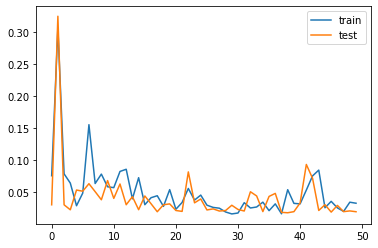

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 21, 32)            7040      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 15,393
Trainable params: 15,393
Non-trainable params: 0
_________________________________________________________________


In [12]:
import keras.models
import tensorflow
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from matplotlib import pyplot as plt 

print(test_X.shape)
# [(9377, 1), (17697, 2), (26017, 3), (34337, 3)]
# []
# m1 = Sequential()
# m1.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
# #model.add(Dropout(rate = 0.4))
# #m1.add(LSTM(50, return_sequences= True))
# m1.add(LSTM(50, return_sequences = True))

# m1.add(LSTM(50))
# #model.add(LSTM(50))
# #model.add(Dense(10))
# m1.add(Dense(1))
# m1.compile(loss='mae', optimizer='adam')
# m1.summary()
...
# design network
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dropout(rate = 0.4))
#model.add((LSTM(32, return_sequences=True)))
model.add(LSTM(32))
#model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
print(model.summary)
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
model.summary()


In [13]:
from keras.layers import concatenate
test_X.shape
...
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days*n_features))

In [14]:

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):-(n_features-2)]), axis=1)
print(inv_yhat.shape)


(64, 2)
